In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
sample_size = 30
ratio = 0.2
sigma_prime = 0.5   
sigma = 1
sigma_comulative = np.sqrt((ratio*sample_size*(sigma_prime**2) + (1-ratio)*sample_size*(sigma**2))/(sample_size-1))
mean1 = 0.0
mean_ = 2
mean_prime = mean_ - 4 * sigma
mean_comulative = ratio*mean_prime + (1-ratio)*mean_

In [3]:
mean_comulative

1.2000000000000002

In [4]:
t_stat_noisy = (mean_comulative - mean1)/(sigma_comulative)
t_stat_noisy

1.2797058485540846

In [5]:
mean2 = 0.4
sigma2 = (mean2 - mean1) /t_stat_noisy
sigma2

0.3125718308249919

In [6]:
sigma_comulative

0.9377154924749757

In [266]:
itr = 100
n_bootstrap = 100
real_t_stat_noisy = np.zeros(itr)
real_pvalue_noisy = np.zeros(itr)
t_stat_noisy_bootstrap = np.zeros((itr,n_bootstrap))
pvalue_noisy_bootstrap = np.zeros((itr,n_bootstrap))

for i in range(itr):
    g1 = np.random.normal(mean1, sigma_comulative, sample_size)
    g2 = np.concatenate([np.random.normal(mean_, sigma_comulative, int((1-ratio)*sample_size)),np.random.normal(mean_prime, sigma_prime, int(ratio*sample_size))])
    real_t_stat_noisy[i], real_pvalue_noisy[i] = stats.ttest_ind(g1, g2)

    for j in range(n_bootstrap):
        g1_bootstrap = np.random.choice(g1, sample_size)
        g2_bootstrap = np.random.choice(g2, sample_size)
        t_stat_noisy_bootstrap[i,j], pvalue_noisy_bootstrap[i,j] = stats.ttest_ind(g1_bootstrap, g2_bootstrap)

        

In [267]:

real_t_stat = np.zeros(itr)
real_pvalue = np.zeros(itr)
t_stat_bootstrap = np.zeros((itr,n_bootstrap))
pvalue_bootstrap = np.zeros((itr,n_bootstrap))

for i in range(itr):
    g1 = np.random.normal(mean1, sigma2, sample_size)
    g2 = np.random.normal(mean2, sigma2, sample_size)
    real_t_stat[i], real_pvalue[i] = stats.ttest_ind(g1, g2)

    for j in range(n_bootstrap):
        g1_bootstrap = np.random.choice(g1, sample_size)
        g2_bootstrap = np.random.choice(g2, sample_size)
        t_stat_bootstrap[i,j], pvalue_bootstrap[i,j] = stats.ttest_ind(g1_bootstrap, g2_bootstrap)

        

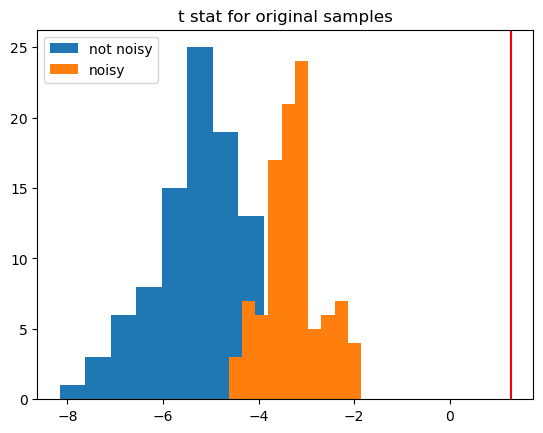

In [268]:
plt.hist(real_t_stat, label='not noisy')
plt.hist(real_t_stat_noisy, label='noisy')
plt.axvline(x=t_stat_noisy, color='r')
plt.legend()
plt.title('t stat for original samples')
plt.show()

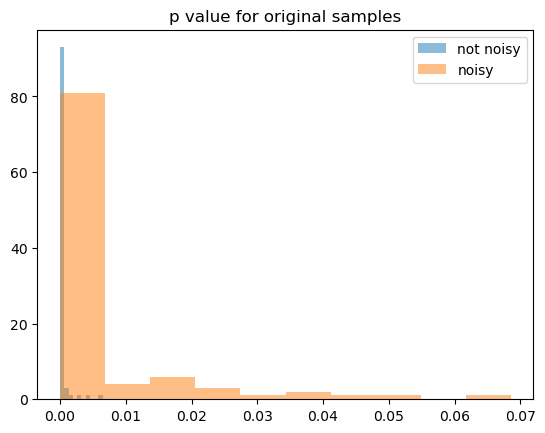

In [269]:
plt.hist(real_pvalue, alpha=0.5, label='not noisy')
plt.hist(real_pvalue_noisy, alpha=0.5, label='noisy')
plt.legend()
plt.title('p value for original samples')
plt.show()

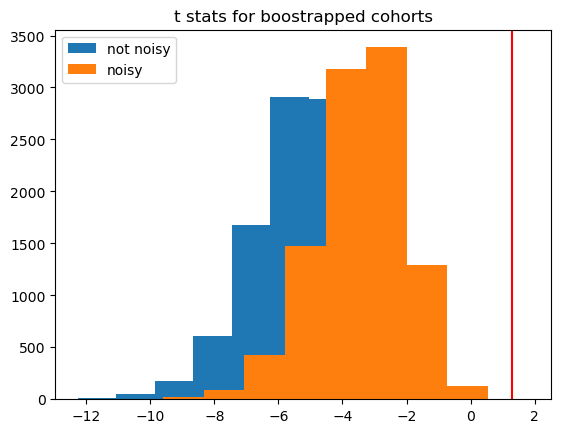

In [270]:
plt.hist(np.ravel(t_stat_bootstrap), label='not noisy')
plt.hist(np.ravel(t_stat_noisy_bootstrap), label='noisy')
plt.axvline(x=t_stat_noisy, color='r')
plt.legend()
plt.title('t stats for boostrapped cohorts')
plt.show()

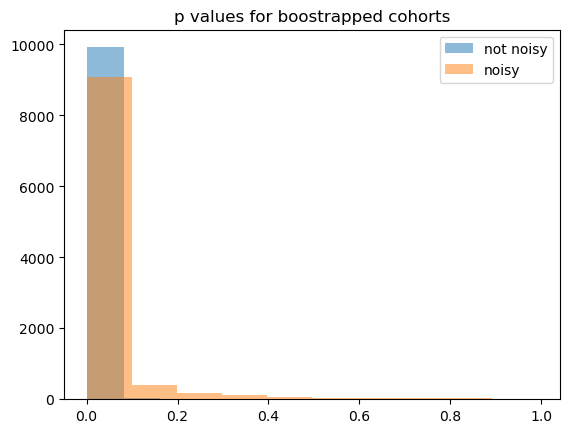

In [271]:
plt.hist(np.ravel(pvalue_bootstrap), alpha=0.5, bins=10, label="not noisy")
plt.hist(np.ravel(pvalue_noisy_bootstrap), alpha=0.5, bins=10, label='noisy')
plt.legend()
plt.title('p values for boostrapped cohorts')
plt.show()

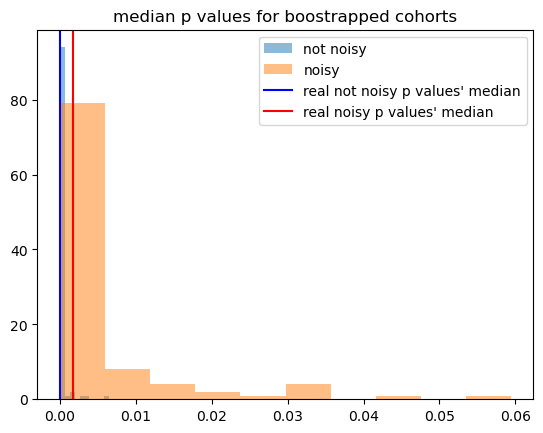

In [272]:
median_pvalue_bootstrap_noisy = np.median(pvalue_noisy_bootstrap, axis=1)
median_pvalue_bootstrap = np.median(pvalue_bootstrap, axis=1)
plt.hist(median_pvalue_bootstrap, alpha=0.5, bins=10, label="not noisy")
plt.hist(median_pvalue_bootstrap_noisy, alpha=0.5, bins=10, label='noisy')
plt.axvline(x=np.median(real_pvalue), color='b', label="real not noisy p values' median")
plt.axvline(x=np.median(real_pvalue_noisy), color='r', label="real noisy p values' median")
plt.legend()
plt.title('median p values for boostrapped cohorts')
plt.show()

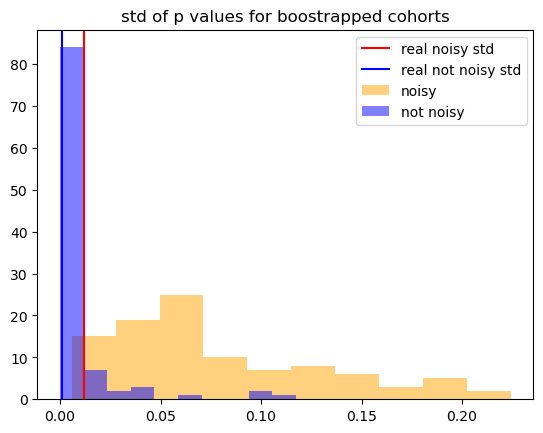

In [273]:
plt.axvline(np.std(real_pvalue_noisy), color='r', label='real noisy std')
plt.axvline(np.std(real_pvalue), color='b', label='real not noisy std')
plt.hist(np.std(pvalue_noisy_bootstrap, axis=1), alpha=0.5, bins=10, label='noisy', color='orange')
plt.hist(np.std(pvalue_bootstrap, axis=1), alpha=0.5, bins=10, label='not noisy', color='blue')
plt.legend()
plt.title('std of p values for boostrapped cohorts')
plt.show()

In [274]:
t_stat_noisy_bootstrap_mean = np.mean(t_stat_noisy_bootstrap, axis=1)
t_stat_noisy_bootstrap_std = np.std(t_stat_noisy_bootstrap, axis=1)
t_stat_bootstrap_mean = np.mean(t_stat_bootstrap, axis=1)
t_stat_bootstrap_std = np.std(t_stat_bootstrap, axis=1)

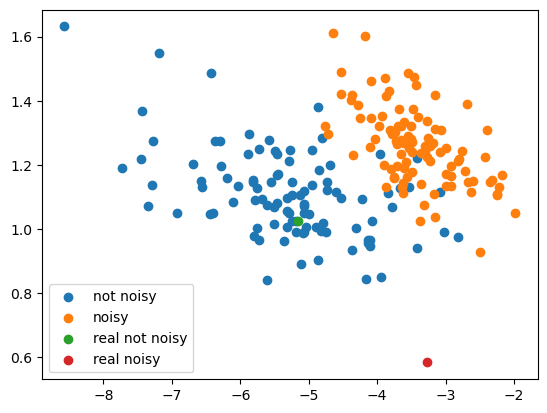

In [275]:
plt.scatter(t_stat_bootstrap_mean, t_stat_bootstrap_std, label='not noisy')
plt.scatter(t_stat_noisy_bootstrap_mean, t_stat_noisy_bootstrap_std, label='noisy') 
plt.scatter(np.mean(real_t_stat), np.std(real_t_stat), label='real not noisy')
plt.scatter(np.mean(real_t_stat_noisy), np.std(real_t_stat_noisy), label='real noisy')
plt
plt.legend()
plt.show()

In [276]:
pvalue_bootstrap_mean = np.mean(pvalue_bootstrap, axis=1)
pvalue_bootstrap_std = np.std(pvalue_bootstrap, axis=1)
pvalue_noisy_bootstrap_mean = np.mean(pvalue_noisy_bootstrap, axis=1)
pvalue_noisy_bootstrap_std = np.std(pvalue_noisy_bootstrap, axis=1)

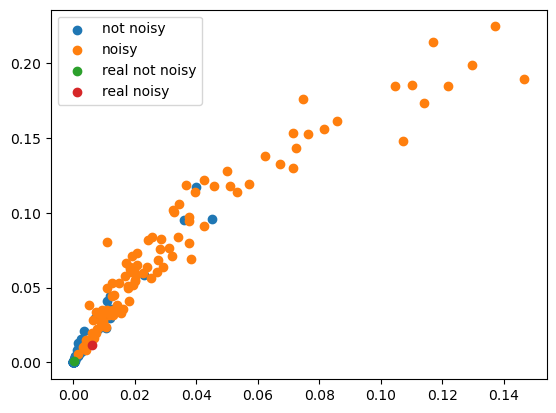

In [277]:
plt.scatter(pvalue_bootstrap_mean, pvalue_bootstrap_std, label='not noisy')
plt.scatter(pvalue_noisy_bootstrap_mean, pvalue_noisy_bootstrap_std, label='noisy') 
plt.scatter(np.mean(real_pvalue), np.std(real_pvalue), label='real not noisy')
plt.scatter(np.mean(real_pvalue_noisy), np.std(real_pvalue_noisy), label='real noisy')
plt
plt.legend()
plt.show()

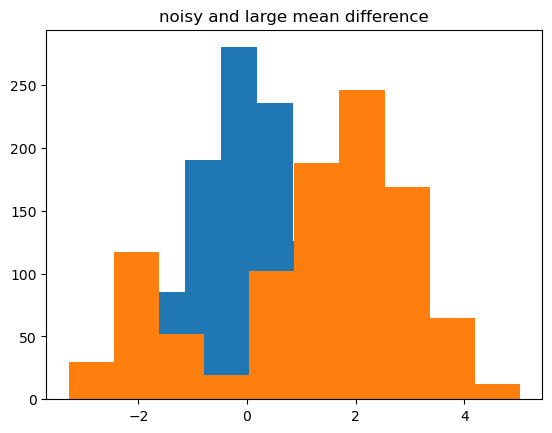

In [278]:
n = 1000
plt.hist(np.random.normal(mean1, sigma_comulative, n))
concat = np.concatenate([np.random.normal(mean_, sigma, int((1-ratio)*n)),
                         np.random.normal(mean_prime, sigma_prime, int(ratio*n))])
plt.hist(concat)
plt.title("noisy and large mean difference")
plt.show()

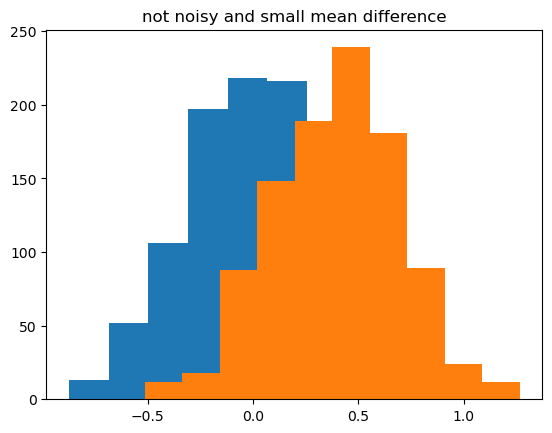

In [279]:
plt.hist(np.random.normal(mean1, sigma2, n))
plt.hist(np.random.normal(mean2, sigma2, n))
plt.title("not noisy and small mean difference")
plt.show()

In [280]:
mean2/sigma2

1.2797058485540846

In [281]:
mean_comulative/sigma_comulative

1.2797058485540846

In [7]:
def jackknife_hypothesis_tests(g1, g2, Hypothesis_testing_func, n_jackknife, **kwargs):

    jackknife_statistics = np.zeros((n_jackknife, 2))
    sample_statistics = Hypothesis_testing_func(g1, g2, **kwargs)

    jackknife_sample_size = int(len(g1) * 0.632)

    g1_jackknife = [np.random.choice(g1, size=jackknife_sample_size, replace=False) for i in range(n_jackknife)]
    g2_jackknife = [np.random.choice(g2, size=jackknife_sample_size, replace=False) for i in range(n_jackknife)]

    for i in range(n_jackknife):
        jackknife_statistics[i] = Hypothesis_testing_func(g1_jackknife[i], g2_jackknife[i], **kwargs)[:2]

    return sample_statistics, jackknife_statistics, [g1_jackknife, g2_jackknife]
    
   

In [15]:
itr = 100
n_jackknife = 50
sample_size = 30
sample_statistics_noisy = np.zeros((itr, 2))
jackknife_statistics_noisy = np.zeros((itr, n_jackknife, 2))

In [16]:
for i in range(itr):
    
    g1 = np.random.normal(mean1, sigma_comulative, sample_size)
    g2 = np.concatenate([np.random.normal(mean_, sigma_comulative, int((1-ratio)*sample_size)),np.random.normal(mean_prime, sigma_prime, int(ratio*sample_size))])
    sample_statistics_noisy[i], jackknife_statistics_noisy[i], noisy_samples = jackknife_hypothesis_tests(g1, g2, stats.ttest_ind, n_jackknife)
    

In [17]:
sample_statistics = np.zeros((itr, 2))
jackknife_statistics = np.zeros((itr, n_jackknife, 2))

In [18]:
for i in range(itr):
    
    g1 = np.random.normal(mean1, sigma2, sample_size)
    g2 = np.random.normal(mean2, sigma2, sample_size)
    sample_statistics[i], jackknife_statistics[i], samples = jackknife_hypothesis_tests(g1, g2, stats.ttest_ind, n_jackknife)
    

In [19]:
tstat_jk_noisy = jackknife_statistics_noisy[:, :, 0]
tstat_jk = jackknife_statistics[:, :, 0]
tstat_jk_noisy_mean = np.mean(tstat_jk_noisy, axis=1)
tstat_jk_noisy_std = np.std(tstat_jk_noisy, axis=1)
tstat_jk_mean = np.mean(tstat_jk, axis=1)
tstat_jk_std = np.std(tstat_jk, axis=1)

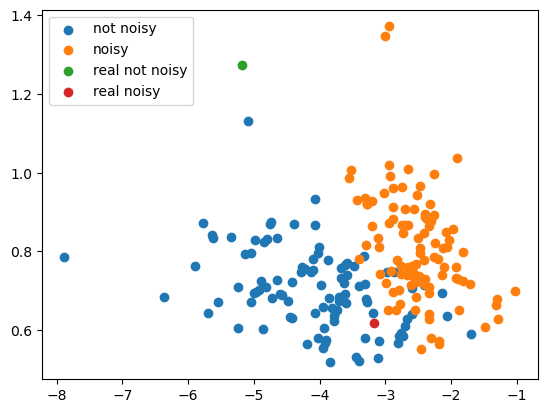

In [20]:
plt.scatter(tstat_jk_mean, tstat_jk_std, label='not noisy')
plt.scatter(tstat_jk_noisy_mean, tstat_jk_noisy_std, label='noisy')
plt.scatter(np.mean(sample_statistics[:, 0]), np.std(sample_statistics[:, 0]), label='real not noisy')
plt.scatter(np.mean(sample_statistics_noisy[:, 0]), np.std(sample_statistics_noisy[:, 0]), label='real noisy')
plt.legend()
plt.show()

In [21]:
pvalue_jk_noisy = jackknife_statistics_noisy[:, :, 1]
pvalue_jk = jackknife_statistics[:, :, 1]
pvalue_jk_noisy_mean = np.mean(pvalue_jk_noisy, axis=1)
pvalue_jk_noisy_std = np.std(pvalue_jk_noisy, axis=1)
pvalue_jk_mean = np.mean(pvalue_jk, axis=1)
pvalue_jk_std = np.std(pvalue_jk, axis=1)

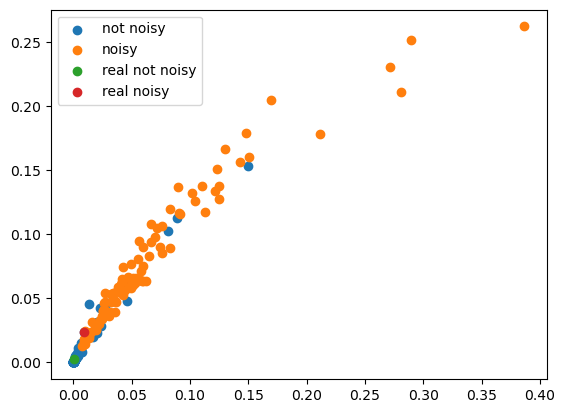

In [22]:
plt.scatter(pvalue_jk_mean, pvalue_jk_std, label='not noisy')
plt.scatter(pvalue_jk_noisy_mean, pvalue_jk_noisy_std, label='noisy')
plt.scatter(np.mean(sample_statistics[:, 1]), np.std(sample_statistics[:, 1]), label='real not noisy')
plt.scatter(np.mean(sample_statistics_noisy[:, 1]), np.std(sample_statistics_noisy[:, 1]), label='real noisy')
plt.legend()
plt.show()